In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Visualizing Missing Data


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/COVID-19 Coronavirus.csv",header=None)
df.head()
# header=None : column names are automatically numbered with numeric indices (0, 1, 2, ...)

,0,1,2,3,4,5,6,7,8,9
0,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638


In [5]:
df.rename(columns={
                      0:'Country',
                      1:'Other names',
                      2:'ISO',
                      3:'Population',
                      4:'Continent',
                      5:'Total Cases',
                      6:'Total Deaths',
                      7:'TC1Mpop',
                      8:'TD1Mpop',
                      9:'Death percentage'
},inplace=True)

In [6]:
df.head()

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
0,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638


In [7]:
df.drop(index=0,inplace=True)
df.head()

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638
5,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438434


In [8]:
print(df["Population"].dtypes)

object


In [9]:
df["Population"] = df["Population"].astype(int)
# df['Population'] = df['Population'].map(int)
df["Population"].dtypes

dtype('int64')

In [10]:
df["Total Cases"] = df["Total Cases"].astype(int)   # or map(int)
df["TC1Mpop"] = df["TC1Mpop"].astype(int)
df["Total Deaths"] = df["Total Deaths"].astype(int)
df["Total Deaths"] = df["Total Deaths"].astype(int)
df["TD1Mpop"] = df["TD1Mpop"].astype(int)
df['Death percentage'] = df['Death percentage'].map(float)
print(df.dtypes)

Country              object
Other names          object
ISO                  object
Population            int64
Continent            object
Total Cases           int64
Total Deaths          int64
TC1Mpop               int64
TD1Mpop               int64
Death percentage    float64
dtype: object


In [11]:
df.columns

Index(['Country', 'Other names', 'ISO', 'Population', 'Continent',
       'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop',
       'Death percentage'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 1 to 225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           225 non-null    object 
 1   Other names       224 non-null    object 
 2   ISO               225 non-null    object 
 3   Population        225 non-null    int64  
 4   Continent         225 non-null    object 
 5   Total Cases       225 non-null    int64  
 6   Total Deaths      225 non-null    int64  
 7   TC1Mpop           225 non-null    int64  
 8   TD1Mpop           225 non-null    int64  
 9   Death percentage  225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [13]:
df = df.drop(['Other names','ISO'],axis=1)

In [14]:
df.describe() # only works on numeric data
# Provides summary statistics about the dataFrame's numeric columns

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


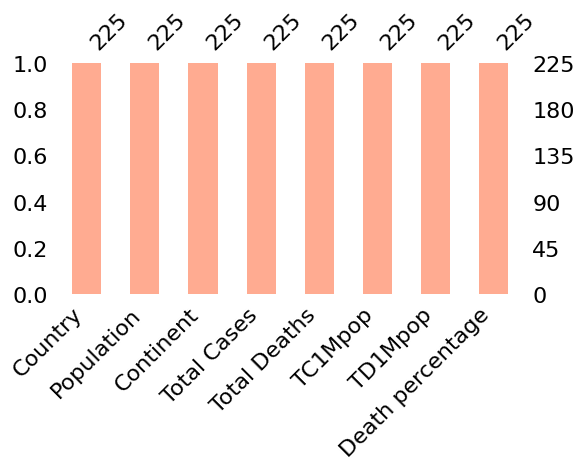

In [15]:
msno.bar(df , figsize=(6,3) , color="#FFAB91")
plt.show()
# amount of missing data in the dataset

In [16]:
df.isnull().sum()

Country             0
Population          0
Continent           0
Total Cases         0
Total Deaths        0
TC1Mpop             0
TD1Mpop             0
Death percentage    0
dtype: int64

In [17]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage']

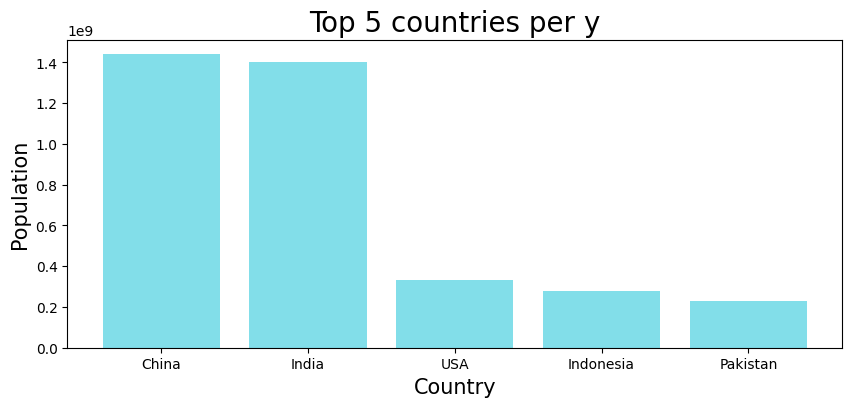

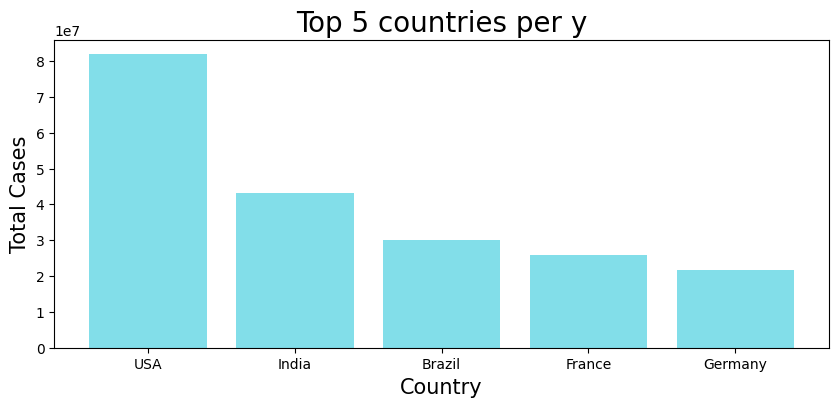

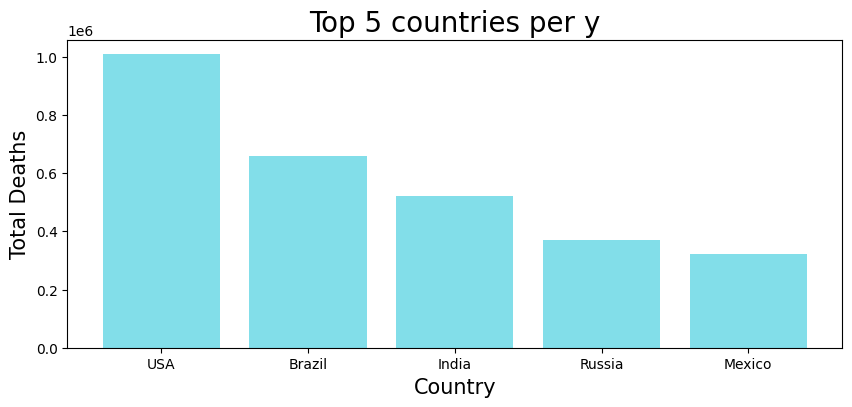

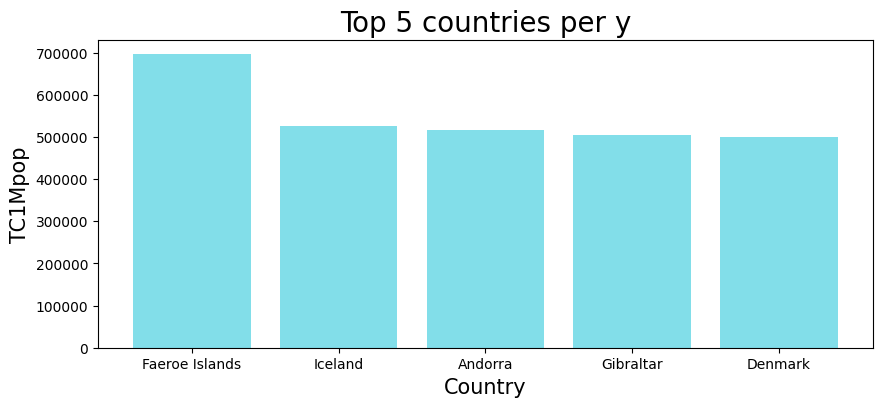

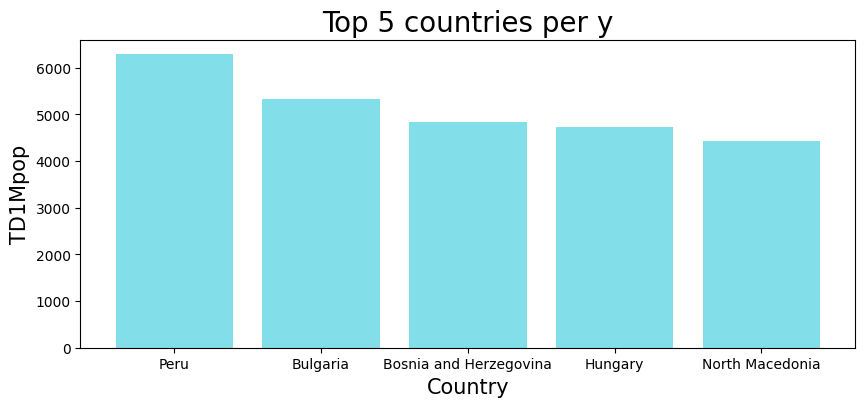

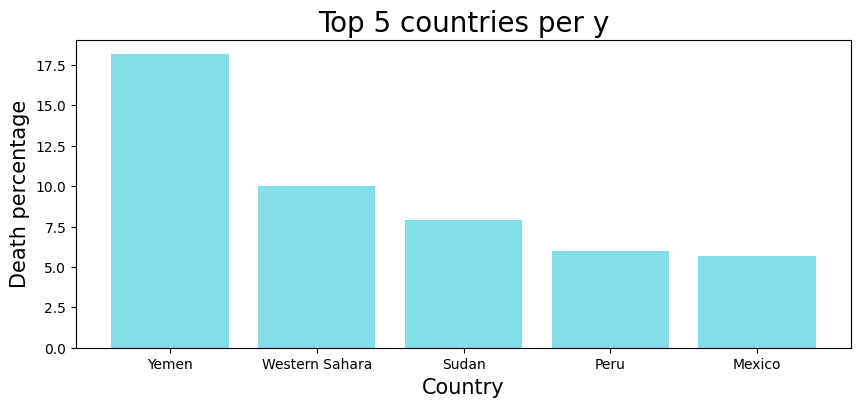

In [27]:
for column in columns:
  top5 = df.nlargest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top5["Country"],top5[column],color="#4DD0E1",alpha=0.7)
  plt.xlabel("Country" , fontsize=15)
  plt.ylabel(column , fontsize=15)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

In [22]:
Europe=df[df['Continent']=='Europe']

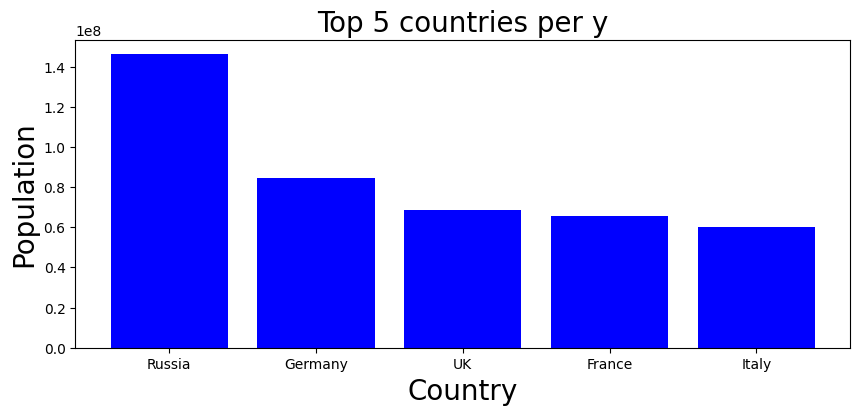

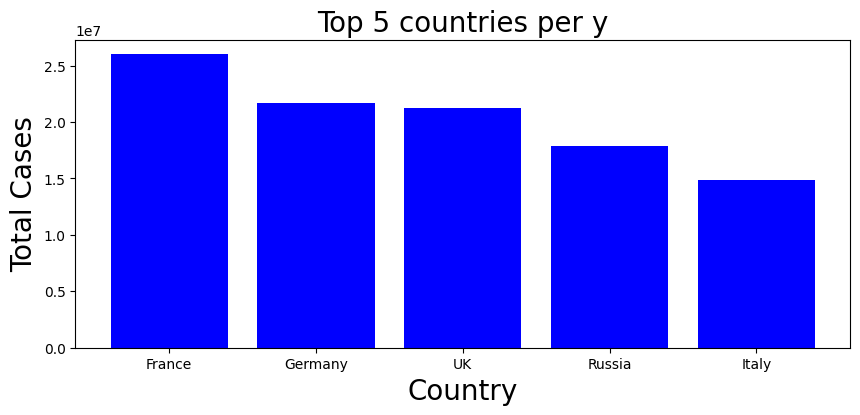

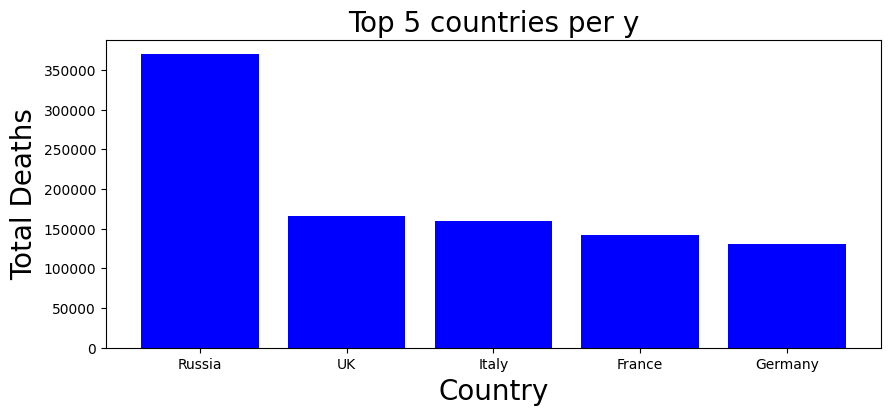

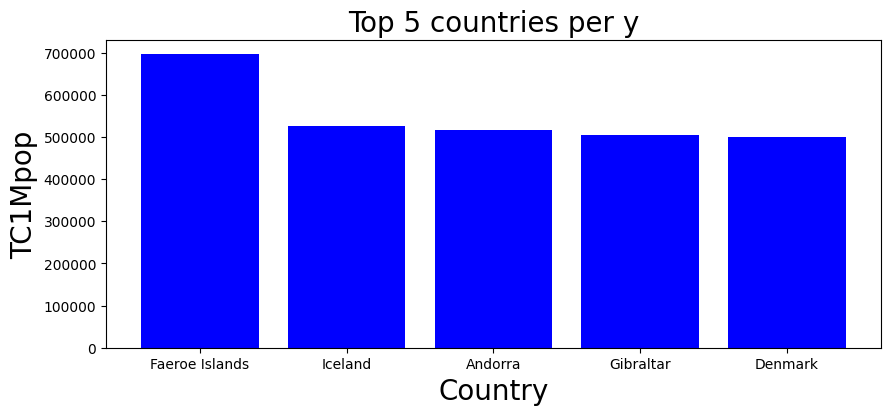

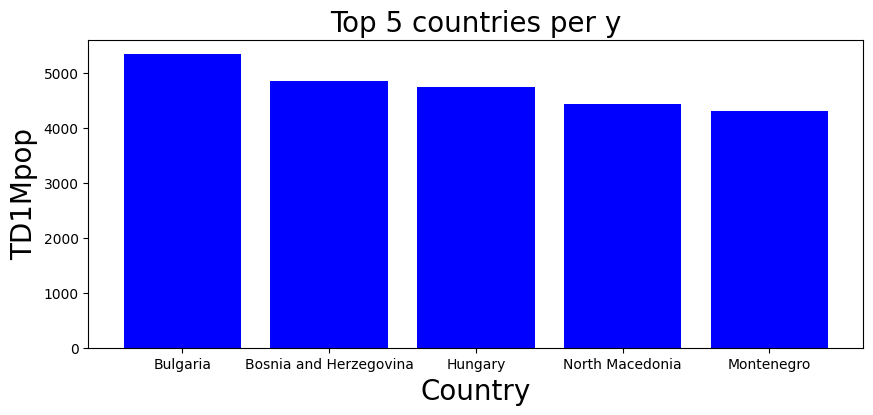

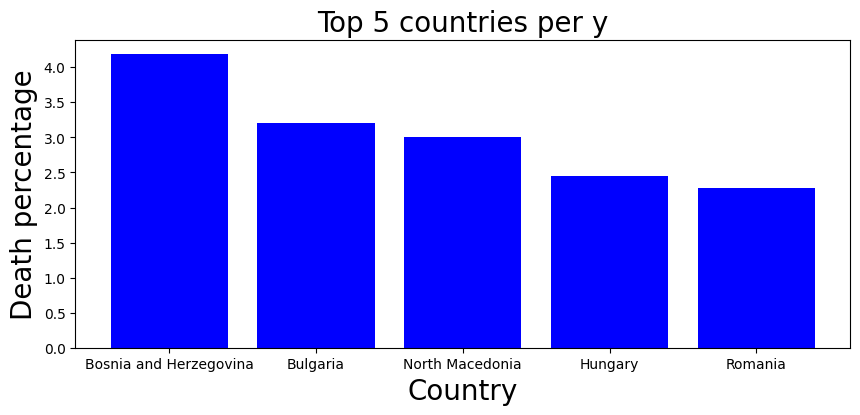

In [26]:
for column in columns:
  top5 = Europe.nlargest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top5['Country'], top5[column],color="blue",alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

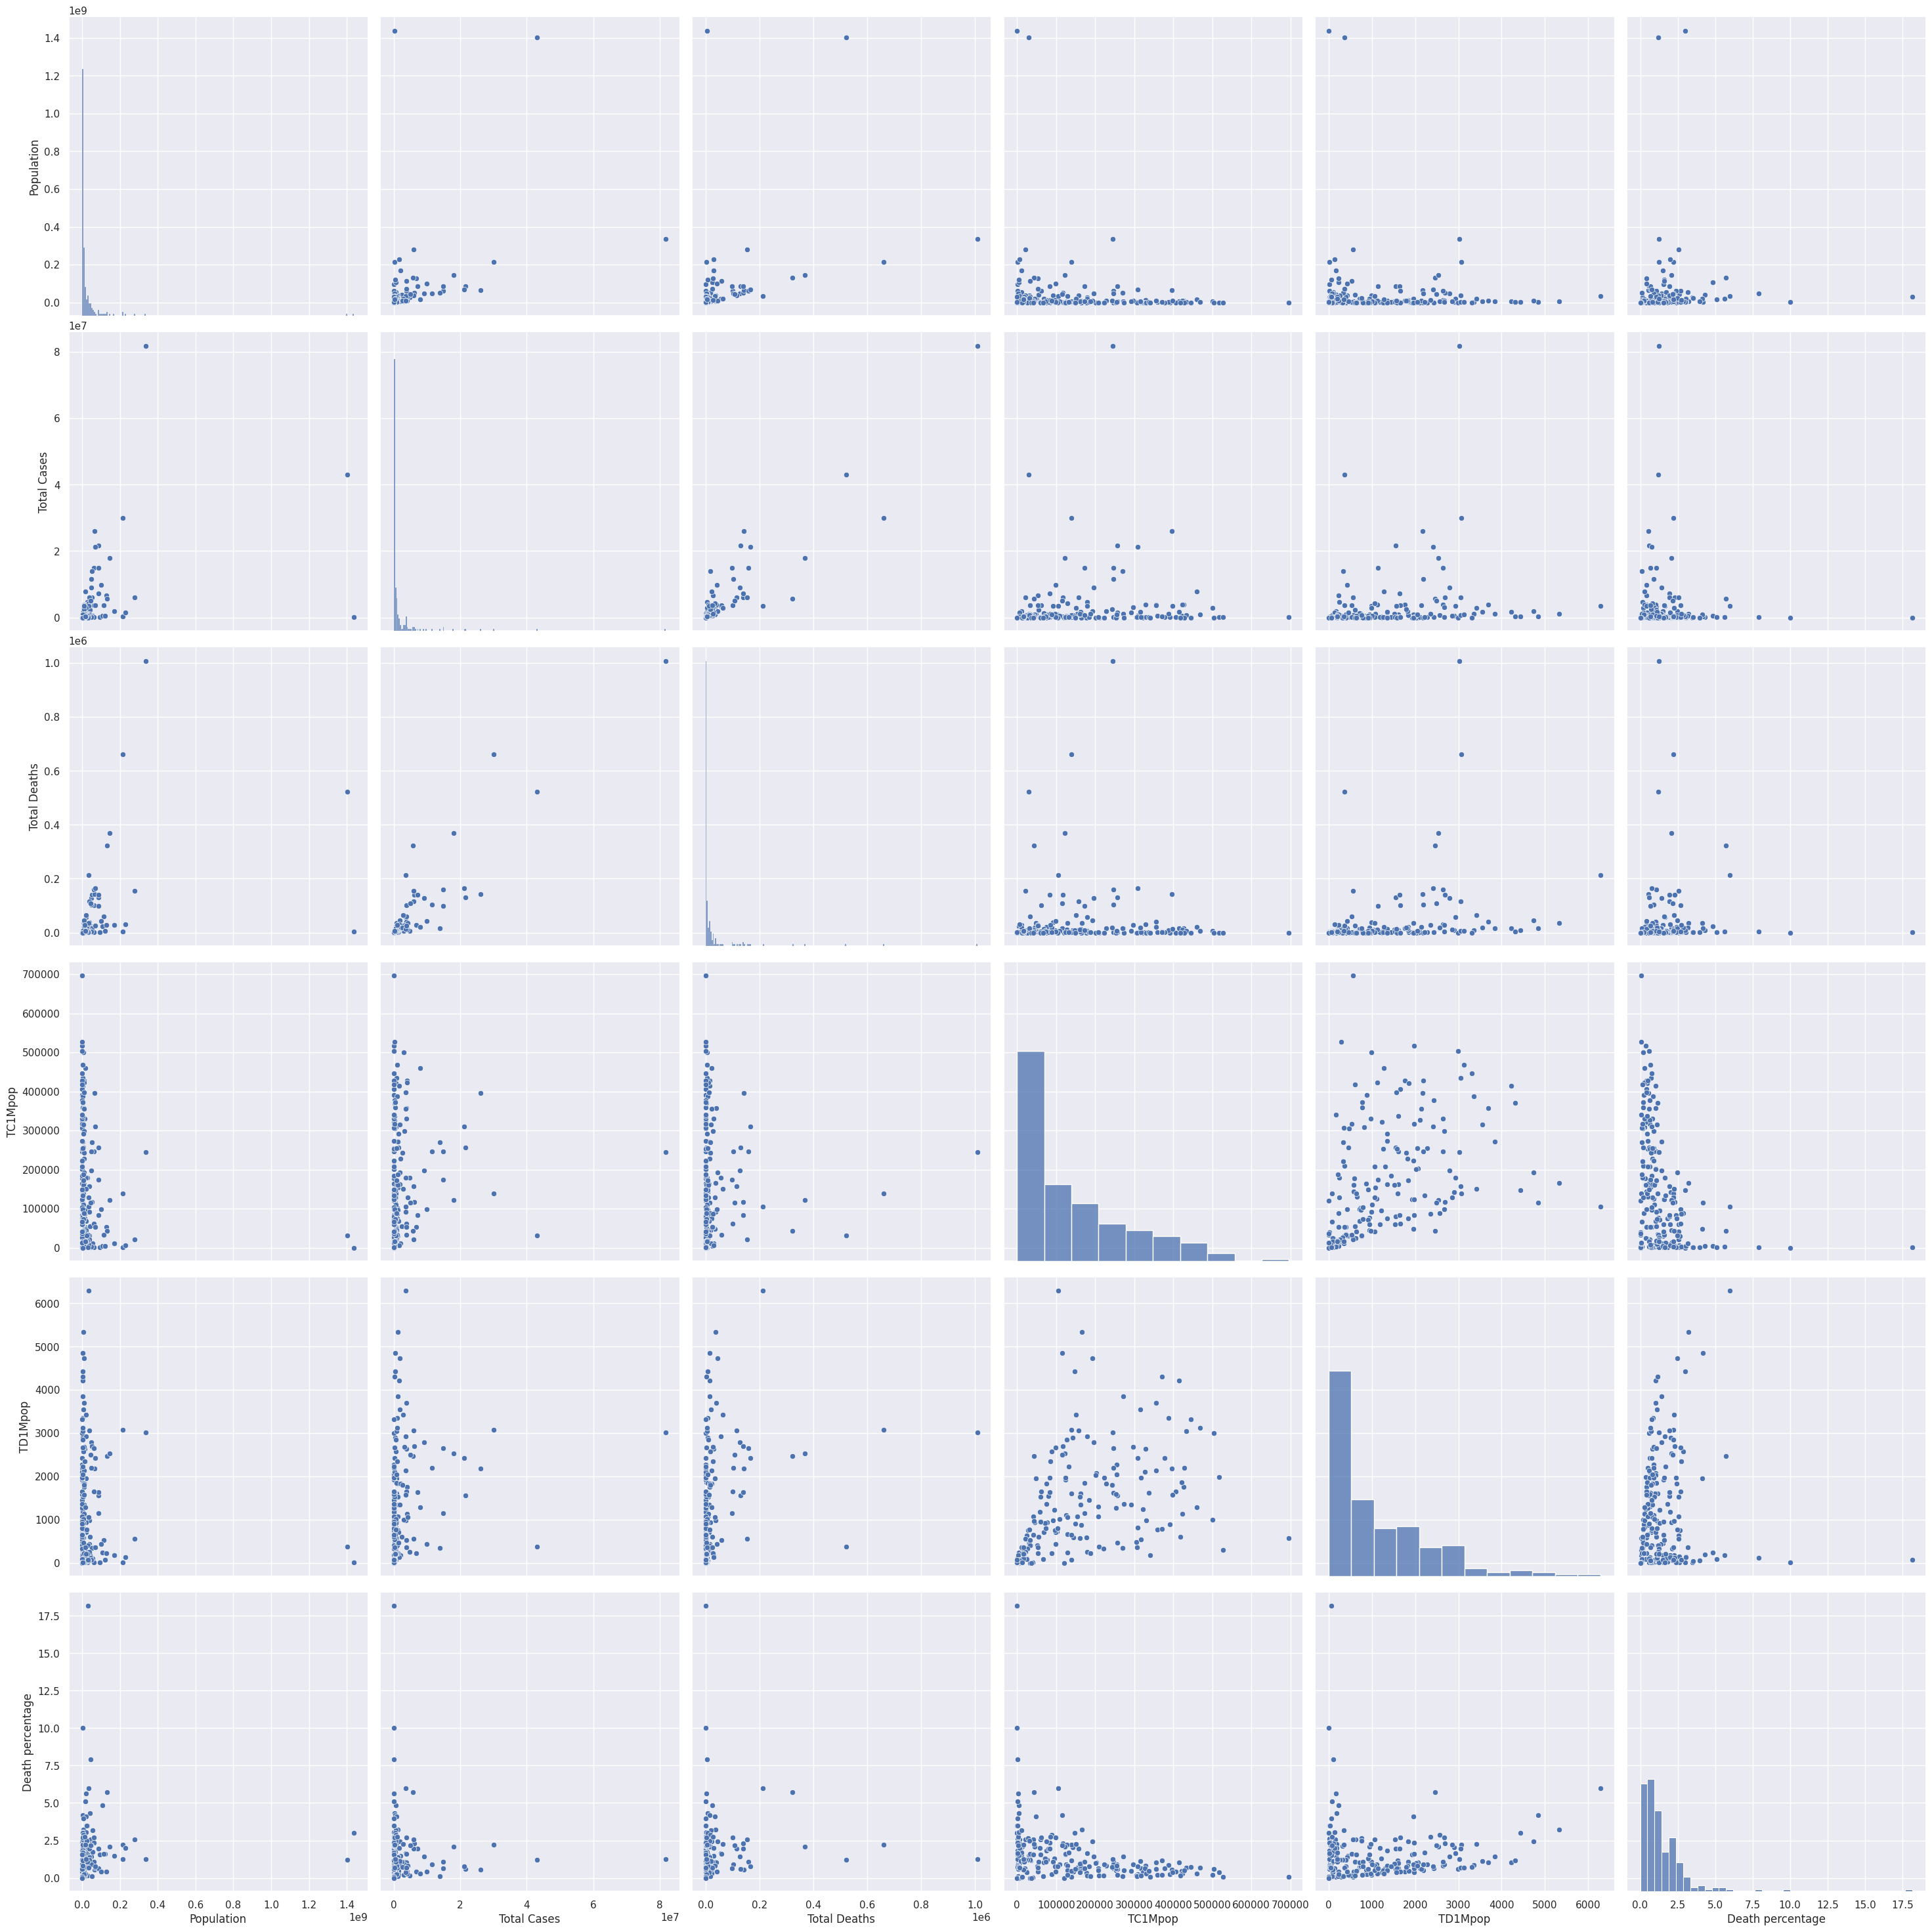

In [31]:
sns.set()
sns.pairplot(df[columns],height = 5 ,kind ='scatter')
plt.show()

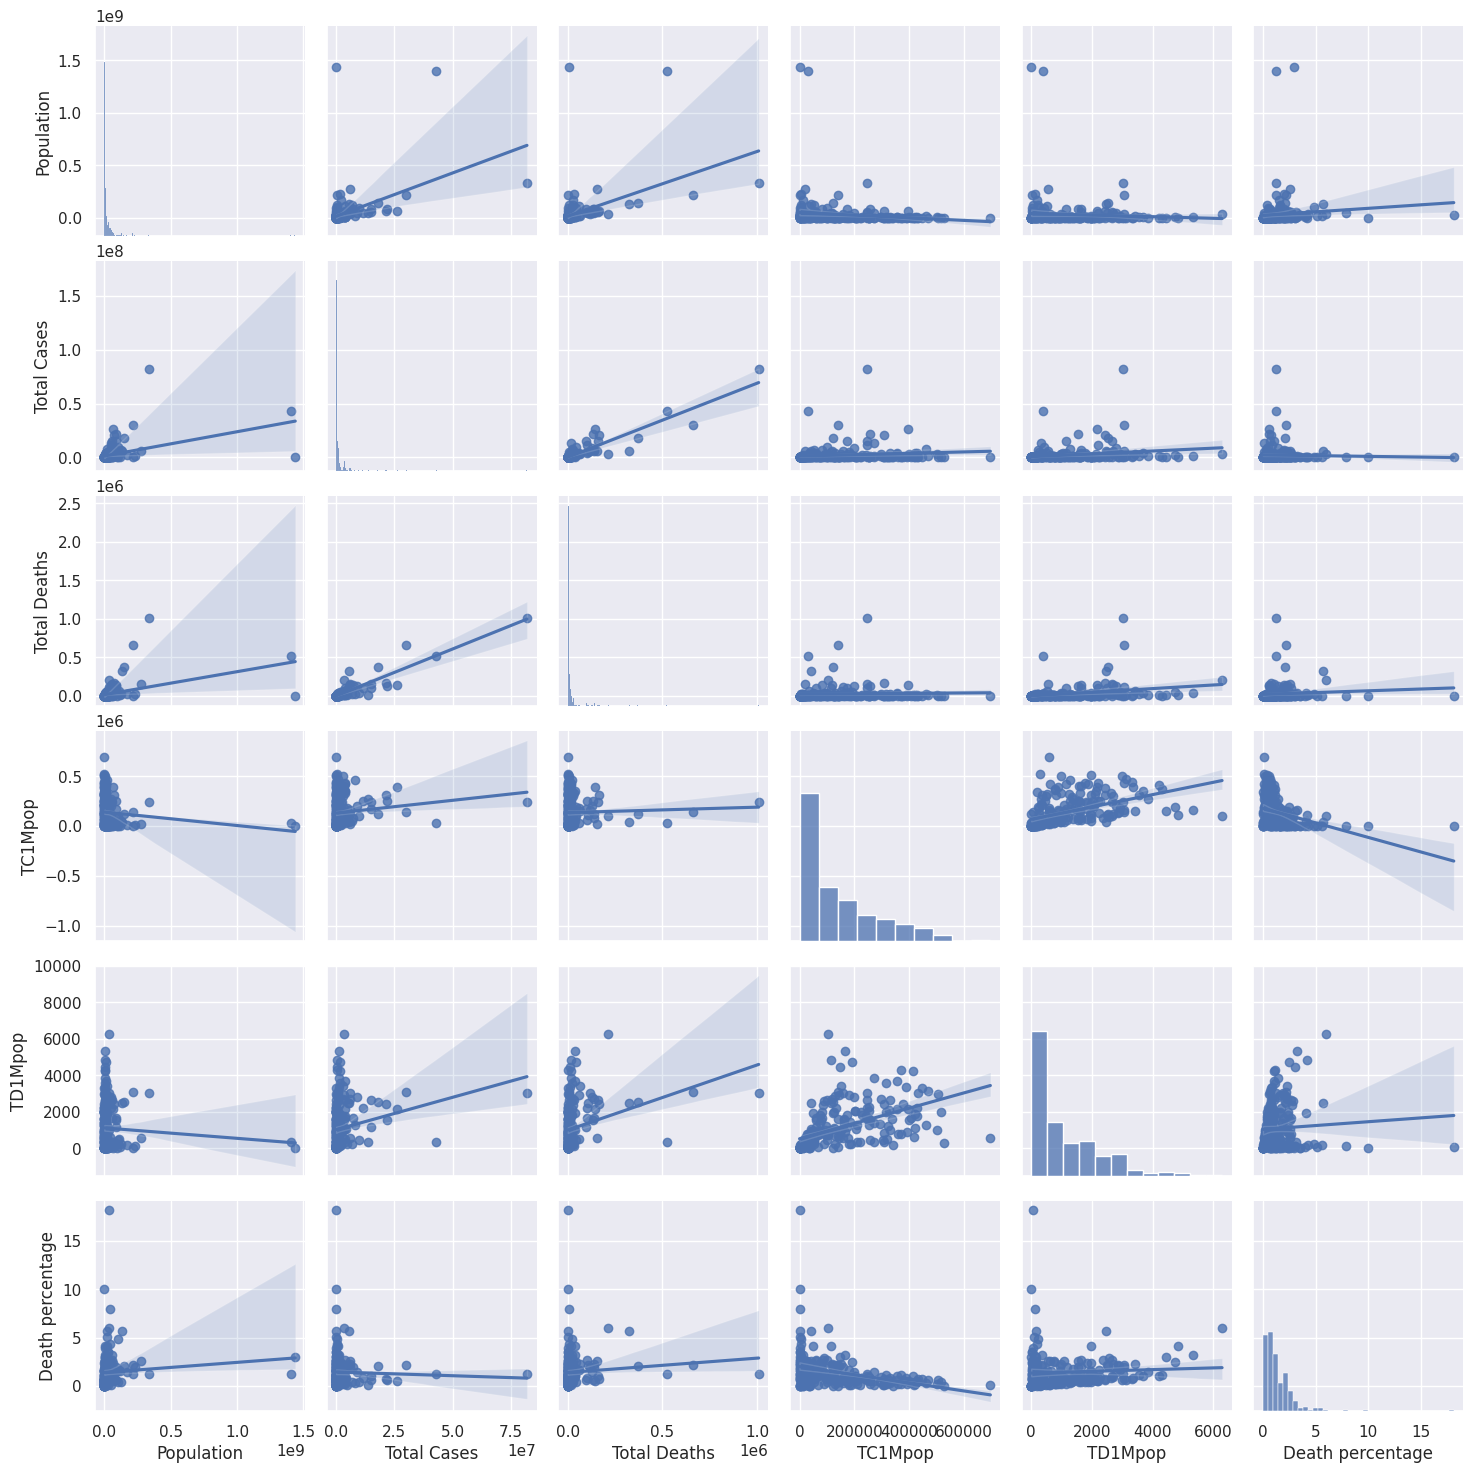

In [33]:
sns.pairplot(df[columns], kind='reg')

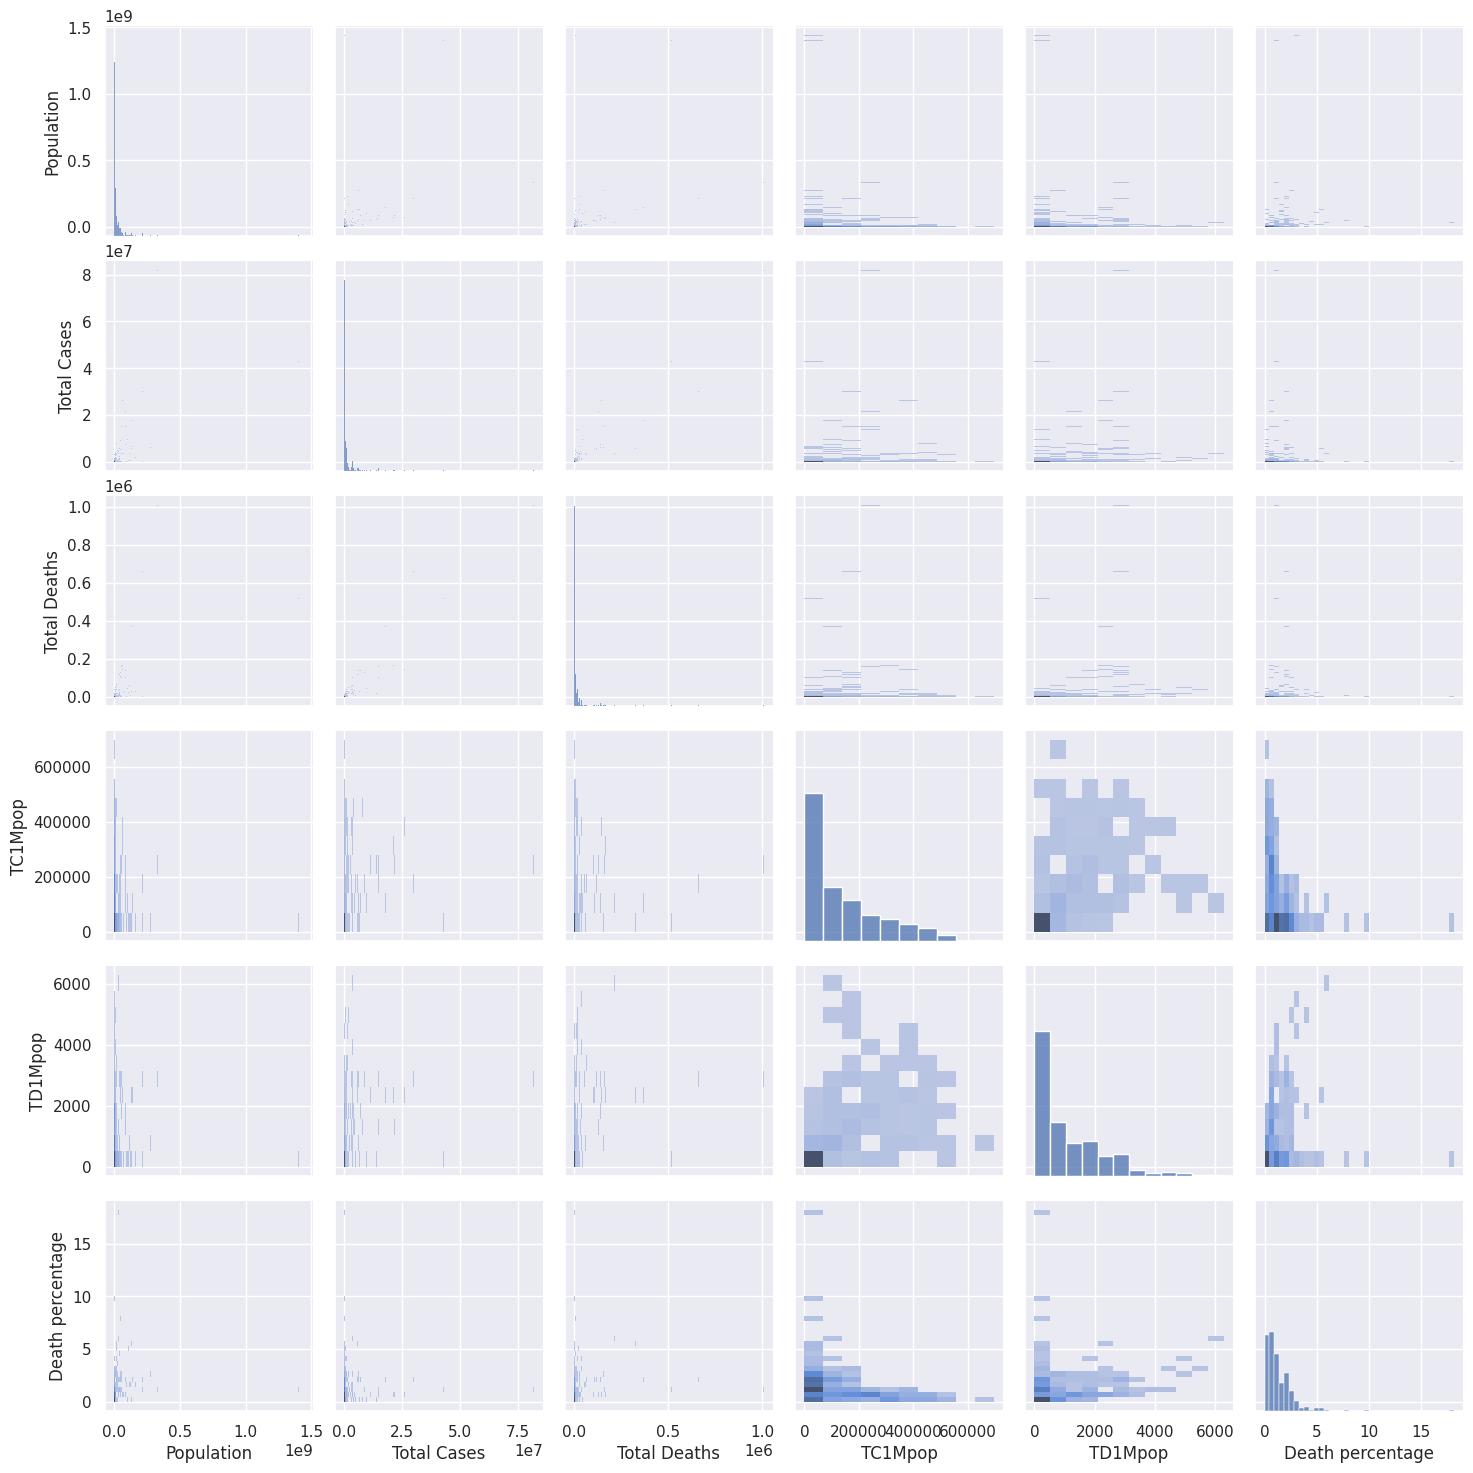

In [34]:
sns.pairplot(df[columns], kind='hist')

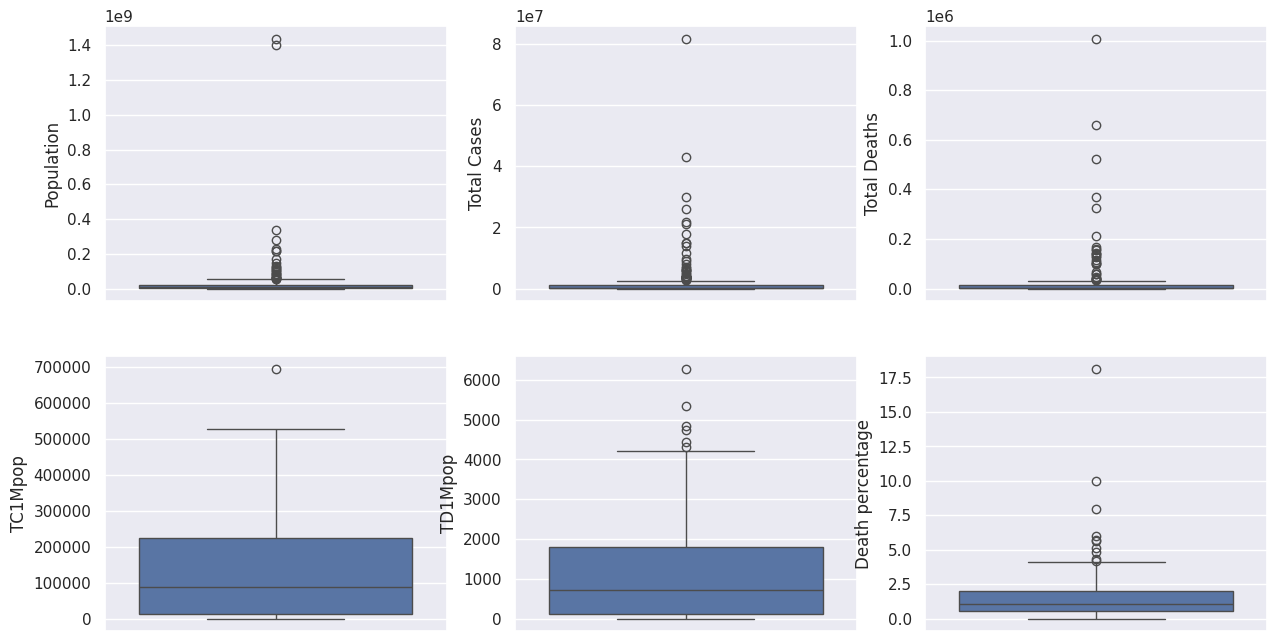

In [38]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature])
    i+=1